# L7 Other Adaptations of Bivariate Plots

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\SS\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In this lesson we are going to expand how to add color to bivariate plots using Seaborn's `hue` parameter. We're going to start with our normal imports, and reading in our data.

In [2]:
# load dataset
df = pd.read_csv('../../Data/fuel-econ.csv')

# create transmission type column
df['trans_type'] = df['trans'].apply(lambda x:x.split()[0])

To add color to most Seaborn plots, we can just add the name of a column in the `hue` parameter.

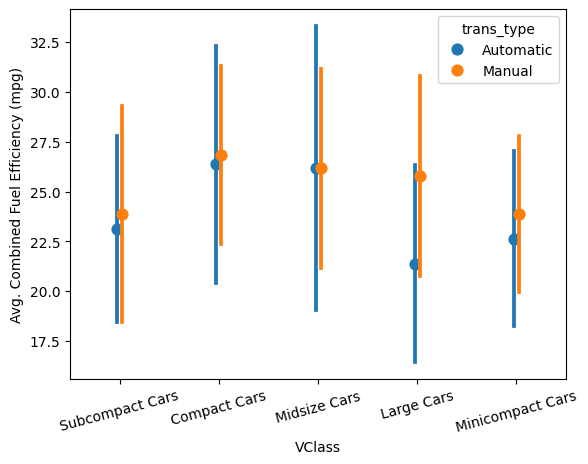

In [3]:
sns.pointplot(data=df, x='VClass', y='comb', 
             hue='trans_type', errorbar='sd',
             linestyles="", dodge=True);
plt.xticks(rotation = 15)
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

We can also create a multivariate clustered bar plot with `hue` as well.

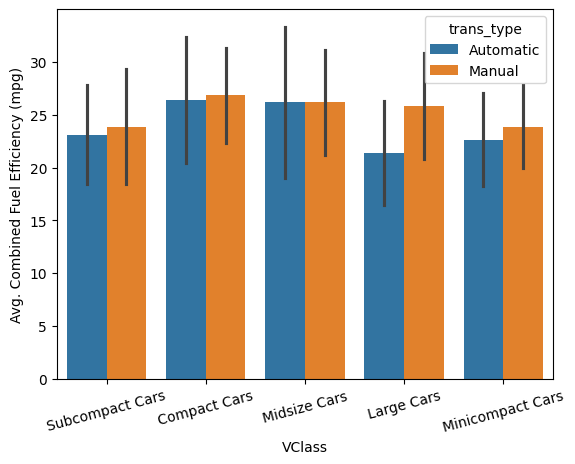

In [4]:
# Clustered Bar Plot of Fuel Efficiency by Vehicle Class and Transmission Type
sns.barplot(data=df, x='VClass', y='comb', hue='trans_type',
            errorbar='sd');
plt.xticks(rotation = 15)
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

Similarly, we can create a similar comparison using the boxplot function to create a "clustered box chart."

Text(0, 0.5, 'Avg. Combined Fuel Efficiency (mpg)')

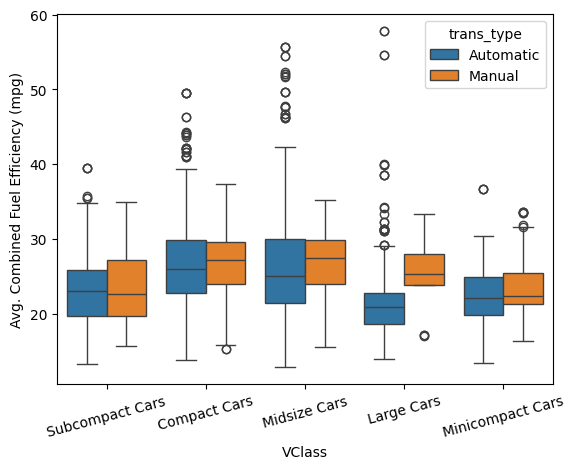

In [5]:
sns.boxplot(data=df, x='VClass', y='comb', hue='trans_type');
plt.xticks(rotation = 15)
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)')

## Adaptation of Heat maps (2d histograms)

We can also adapt heat maps (i.e., 2d histograms) , so that instead of color being based on count, color is based on the mean of a third variable.

Let's start by simply plotting a 2d histogram of combined efficiency vs. engine displacement, with color being the total number of counts.

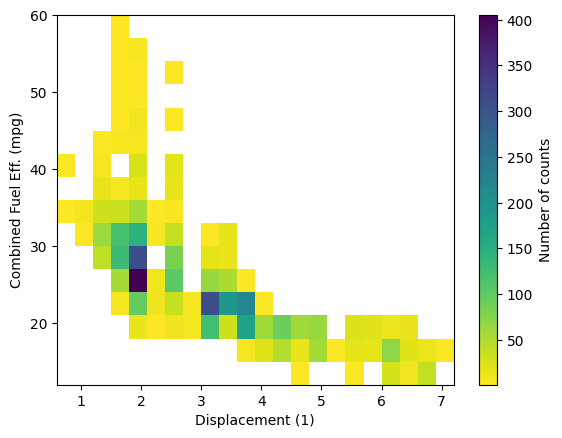

In [6]:
# Multivariate Heatmap
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58+3, 3)

# Plot the heatmap
plt.hist2d(data=df, x='displ', y='comb', cmin=0.5, 
          cmap='viridis_r', bins=[bins_x, bins_y]);
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');
plt.colorbar(label='Number of counts');

Let's now change this heat map of fuel efficiency against engine size, so that average CO2 output is plotted instead. There is a weights parameter hist2d that sets how much each data point is worth in the aggregation.


Our first step is to figure out in which bin each point falls. We compute this using the pandas cut function.

In [7]:
# Determine which bin for each point
displ_bins = pd.cut(df['displ'], bins_x, right=False, 
                    include_lowest=False, labels=False).astype(int)
comb_bins = pd.cut(df['comb'], bins_y, right=False, 
                    include_lowest=False, labels=False).astype(int)

Next, we count up the number of points that fall in each bin. This is done using the groupby and size functions.

In [8]:
# Count the points in each bin
n_points = df.groupby([displ_bins, comb_bins]).size()
n_points = n_points.reset_index().pivot(index = 'displ', columns = 'comb').values


Finally, we use the values attribute to get the number of points as an array. Now, we can get our point weights using all of these values.

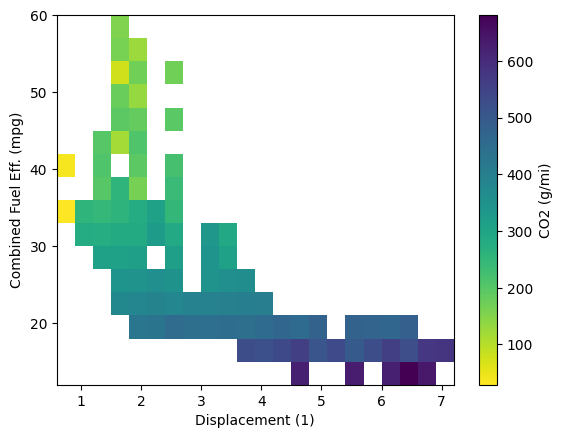

In [9]:
# Divide CO2 by the number of points in each bin
co2_weights = df['co2'] / n_points[displ_bins, comb_bins]

# Plot the heatmap
plt.hist2d(data= df, x='displ', y='comb', cmin=0.5, 
          cmap='viridis_r', bins=[bins_x, bins_y], weights=co2_weights);
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');
plt.colorbar(label = 'CO2 (g/mi)');